# Quickstart

## Basic inference
The easiest way to get started is by using the {class}`~fastdfe.base_inference.BaseInference` class which infers the DFE from a single pairs of SFSs, one neutral and one selected. In this example we create {class}`~fastdfe.spectrum.Spectrum` objects holding the SFS counts and pass it to BaseInference. Note that we are required to specify the number of monomorphic sites (the first entry).

In [6]:
from fastdfe import BaseInference, Spectrum

inf = BaseInference(
    sfs_neut=Spectrum([177130, 997, 441, 228, 156, 117, 114, 83, 105, 109, 652]),
    sfs_sel=Spectrum([797939, 1329, 499, 265, 162, 104, 117, 90, 94, 119, 794])
)

# run inference
inf.run();

INFO:fastdfe:Starting numerical optimization of 10 independently initialized samples which are run in parallel.
INFO:fastdfe:Precomputing linear DFE-SFS transformation using midpoint integration.
INFO:fastdfe:Successfully finished optimization after 103 iterations and 948 function evaluations, obtaining a log-likelihood of -34.783850731873144.
INFO:fastdfe:Inferred parameters: {'all.S_d': -1666.3678382406779, 'all.b': 0.3187694314011719, 'all.p_b': 0.1451331788478119, 'all.S_b': 0.0001, 'all.eps': 0.00534555988772589}.



fastDFE uses maximum likelihood estimation (MLE) to find the DFE. By default, 10 local optimization runs are carried out to make sure a reasonably good global optimum has been bound. The DFE furthermore needs to parametrized where {class}`~fastdfe.parametrization.GammaExpParametrization` is used by default.

We can now plot the inferred DFE in discretized form (cf. {func}`~fastdfe.base_inference.BaseInference.plot_discretized`).

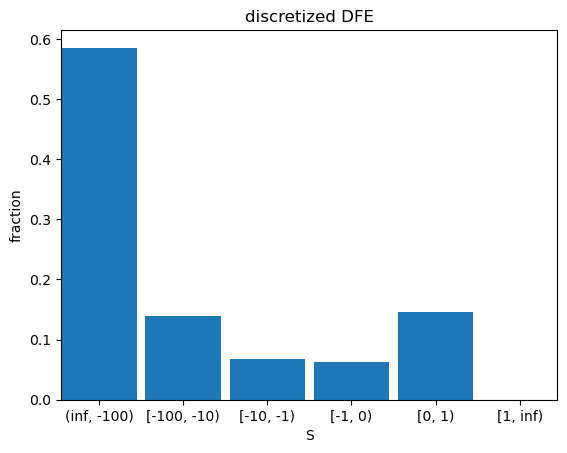

In [7]:
inf.plot_discretized();

We can also plot a comparison of the (selected) modelled and observed SFS (cf. {func}`~fastdfe.base_inference.BaseInference.plot_sfs_comparison`).

<Figure size 640x480 with 0 Axes>

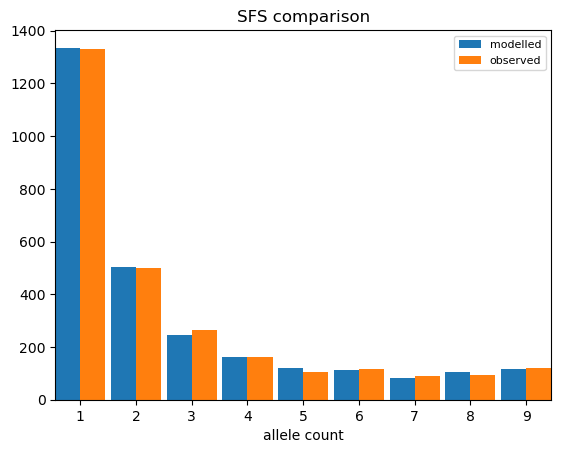

In [8]:
inf.plot_sfs_comparison();

## Bootstrapping

We can perform parametric bootstrapping (cf. {func}`~fastdfe.base_inference.BaseInference.bootstrap`)

INFO:fastdfe:Running 100 bootstrap samples in parallel on 10 cores.


100%|██████████| 100/100 [00:06<00:00, 16.38it/s]


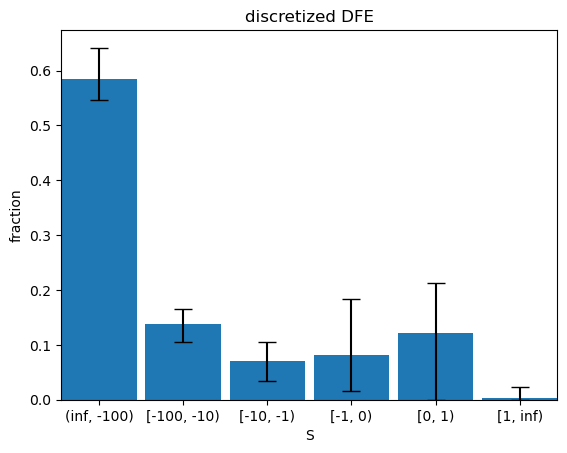

In [9]:
inf.bootstrap(n_samples=100)

# redo the plotting
inf.plot_discretized();

## Serialization

In [10]:
# save the inference object to the file
# we can unserialized the inference by using BaseInference.from_file
inf.to_file("out/serialized.json")

# alternatively we can also save a summary to file
inf.get_summary().to_file("out/summary.json")